\[Python Deployment](https://pycaret.gitbook.io/docs/get-started/functions/deploy)

In [1]:
!pip install -U openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd 
import numpy as np
import sklearn

import matplotlib.pyplot as plt
# pkg for interactive vis

import warnings
warnings.filterwarnings('ignore')
#把warning省略掉

%matplotlib inline

In [ ]:
# preprocessing native data
#df=pd.read_excel("gender-data/python身高體重表.xlsx")
# delete white space in '性別' column
#df['性別']=df['性別'].str.strip()
#df1=df[['身高','體重','Error','性別']].copy()
#df1.to_csv("gender-data/gender.csv",index=False)

In [2]:
file="https://raw.githubusercontent.com/cchuang2009/2022-1/main/Python_IM/gender.csv"
df=pd.read_csv(file)
df

,身高,體重,fake,性別
0,164,47,NaN,女
1,185,55,NaN,男
2,168,48,F,女
3,160,47,NaN,女
4,155,45,NaN,女
5,182,70,T,男
6,183,66,T,男
7,166,47,F,男
8,170,56,T,男
9,174,70,T,男


In [3]:
# encoding '性別' and fake
# '性別' : '女'➜ 0, '男'➜ 1
# 'fake': 'F'➜ 1, else ➜ 0

df['性別'] = df['性別'].map({'女': 0, '男': 1})
df['fake']=df['fake'].apply(lambda x: 1 if x=='F' else 0)

In [6]:
df

,身高,體重,fake,性別
0,164,47,0,0
1,185,55,0,1
2,168,48,1,0
3,160,47,0,0
4,155,45,0,0
5,182,70,0,1
6,183,66,0,1
7,166,47,1,1
8,170,56,0,1
9,174,70,0,1


In [4]:
!pip install --pre pycaret --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 487 kB 5.0 MB/s 


In [5]:
!pip install sktime category_encoders scikit_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 699 kB/s 
     |████████████████████████████████| 72 kB 975 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.0rc4 requires kaleido>=0.2.1, which is not installed.
pycaret 3.0.0rc4 requires plotly-resampler>=0.7.2.2, which is not installed.
pycaret 3.0.0rc4 requires pmdarima!=1.8.1,<2.0.0,>=1.8.0, which is not installed.
pycaret 3.0.0rc4 requires pyod>=0.9.8, which is not installed.
pycaret 3.0.0rc4 requires schemdraw>=0.14, which is not installed.
pycaret 3.0.0rc4 requires tbats>=1.1.0, which is not installed.
pycaret 3.0.0rc4 requires lightgbm>=3.0.0, but you have lightgbm 2.2.3 which is incompatible.
pycaret 3.0.0rc4 requires matplotlib>=3.3.0, but you have matplotlib 3.2.2 which is incompatible.
p

In [7]:
from pycaret.classification import *

In [8]:
data=df[['身高','體重','性別']]

reg1 = setup(data = data, target = '性別')

,Description,Value
0,Session id,7641
1,Target,性別
2,Target type,Binary
3,Original data shape,"(36, 3)"
4,Transformed data shape,"(36, 3)"
5,Transformed train set shape,"(25, 3)"
6,Transformed test set shape,"(11, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.8833,0.9000,0.7500,0.8000,0.7667,0.7400,0.7500,0.0330
rf,Random Forest Classifier,0.8500,0.9000,0.7000,0.7000,0.7000,0.7000,0.7000,0.1620
knn,K Neighbors Classifier,0.8167,0.8750,0.6500,0.8000,0.7000,0.6200,0.6500,0.0370
et,Extra Trees Classifier,0.8000,0.8750,0.7000,0.7500,0.7000,0.5800,0.6000,0.1280
nb,Naive Bayes,0.7833,0.9000,0.7500,0.7167,0.7133,0.5300,0.5500,0.0320
dt,Decision Tree Classifier,0.7667,0.7500,0.7000,0.7000,0.6833,0.4900,0.5000,0.0310
lr,Logistic Regression,0.7000,0.8500,0.7500,0.6667,0.6800,0.4000,0.4000,0.4130
ada,Ada Boost Classifier,0.7000,0.8500,0.6000,0.4833,0.5267,0.3000,0.3000,0.0890
gbc,Gradient Boosting Classifier,0.7000,0.9000,0.6500,0.5667,0.5967,0.3500,0.3500,0.0650
ridge,Ridge Classifier,0.6667,0.0000,0.6500,0.5667,0.5800,0.3000,0.3000,0.0260


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [10]:
# decision tree model
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.3333,0.2500,0.5000,0.5000,0.5000,-0.5000,-0.5000
4,0.6667,0.7500,0.5000,1.0000,0.6667,0.4000,0.5000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=7641, splitter='best')


In [12]:
# tuned dt model
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.6667,0.7500,0.5000,1.0000,0.6667,0.4000,0.5000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [13]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_samples_leaf=3,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       random_state=7641, splitter='best')


1. [AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

An ROC curve plots `TPR(Y)` vs. `FPR(X)` at different classification thresholds
```
         Observations
      |   T   |  F  
   ---|-------|-------
      |       |
 P  T |  TP   |  FP
 r    |       |
 e ---|-------|-------
 d    |       |
    F |  FN   |  TN
      |
      
          TP 
TPR = ----------
        TP + FN

          FP        
FPR = -----------
        FP + TN
```  
AUC stands for "Area under the ROC Curve." 

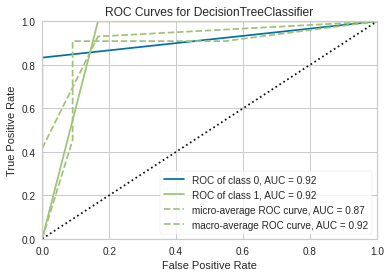

In [14]:
plot_model(tuned_dt, plot = 'auc')

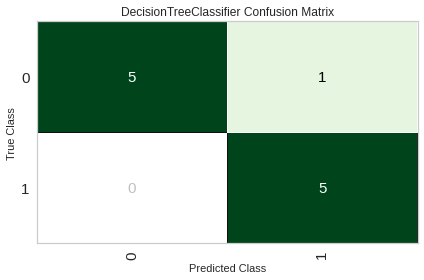

In [15]:
# performance depends on the size of samples, here due to the small size of test samples
plot_model(tuned_dt, plot = 'confusion_matrix')

In [16]:
predict_model(tuned_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9091,0.9167,1.0000,0.8333,0.9091,0.8197,0.8333


,身高,體重,性別,prediction_label,prediction_score
25,160.0,50.0,0,0,0.8571
26,174.0,70.0,1,1,1.0000
27,168.0,48.0,0,0,0.8571
28,166.0,66.0,0,1,1.0000
29,155.0,45.0,0,0,0.8571
30,162.0,52.0,0,0,0.8571
31,167.0,79.0,1,1,1.0000
32,175.0,85.0,1,1,1.0000
33,162.0,52.0,0,0,0.8571
34,169.0,82.0,1,1,1.0000


In [17]:
final_dt = finalize_model(tuned_dt)

In [18]:
save_model(final_dt,'2022_12_8')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['身高', '體重'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose=0))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator...
                  TransformerWrapper(exclude=[], include=None,
                                     transformer=VarianceThreshold(threshold=0))),
                 ('actual_estimat

In [19]:
input_data=pd.DataFrame(data={'身高':[160],'體重':[50]}) 
input_data

,身高,體重
0,160,50


In [20]:
#final_dt.predict([[150],[40]])
#input_data=data[-3:] 
predict_model(tuned_dt,data=input_data)

,身高,體重,prediction_label,prediction_score
0,160.0,50.0,0,0.8571


In [21]:
tuned_dt.predict([[160,50]])

array([0], dtype=int8)

In [22]:
predict_model(tuned_dt,data=input_data)['prediction_label']
#predict_model(tuned_dt,data=input_data)['prediction_label'][0]

0    0
Name: prediction_label, dtype: int64

In [23]:
import numpy as np
sample=[160,50]
sample_list=np.array(sample).reshape(1, -1)

In [24]:
tuned_dt.predict(sample_list)

array([0], dtype=int8)

In [25]:
sample_list

array([[160,  50]])

In [26]:
list(input_data.iloc[0,:])

[160, 50]

In [27]:
tuned_dt.predict(sample_list)

array([0], dtype=int8)

In [28]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_samples_leaf=3,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       random_state=7641, splitter='best')

In [29]:
from sklearn import tree

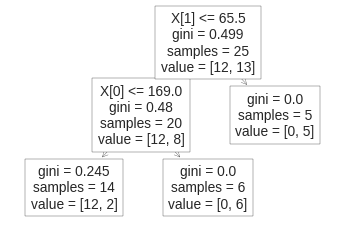

In [30]:
tree.plot_tree(tuned_dt);

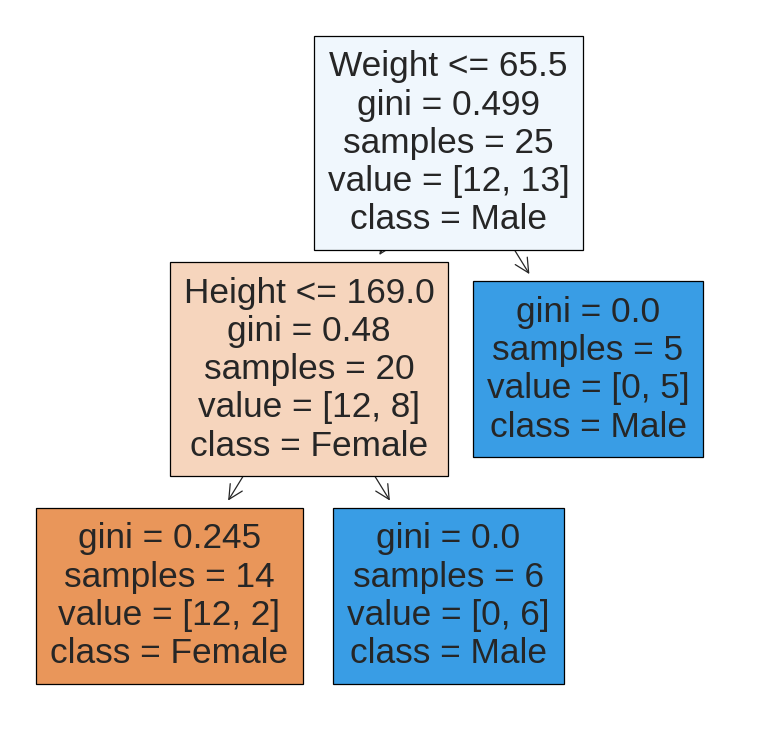

In [31]:
fn=['Height', 'Weight']
cn=["Female","Male"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(tuned_dt,feature_names = fn, 
               class_names=cn,filled = True);

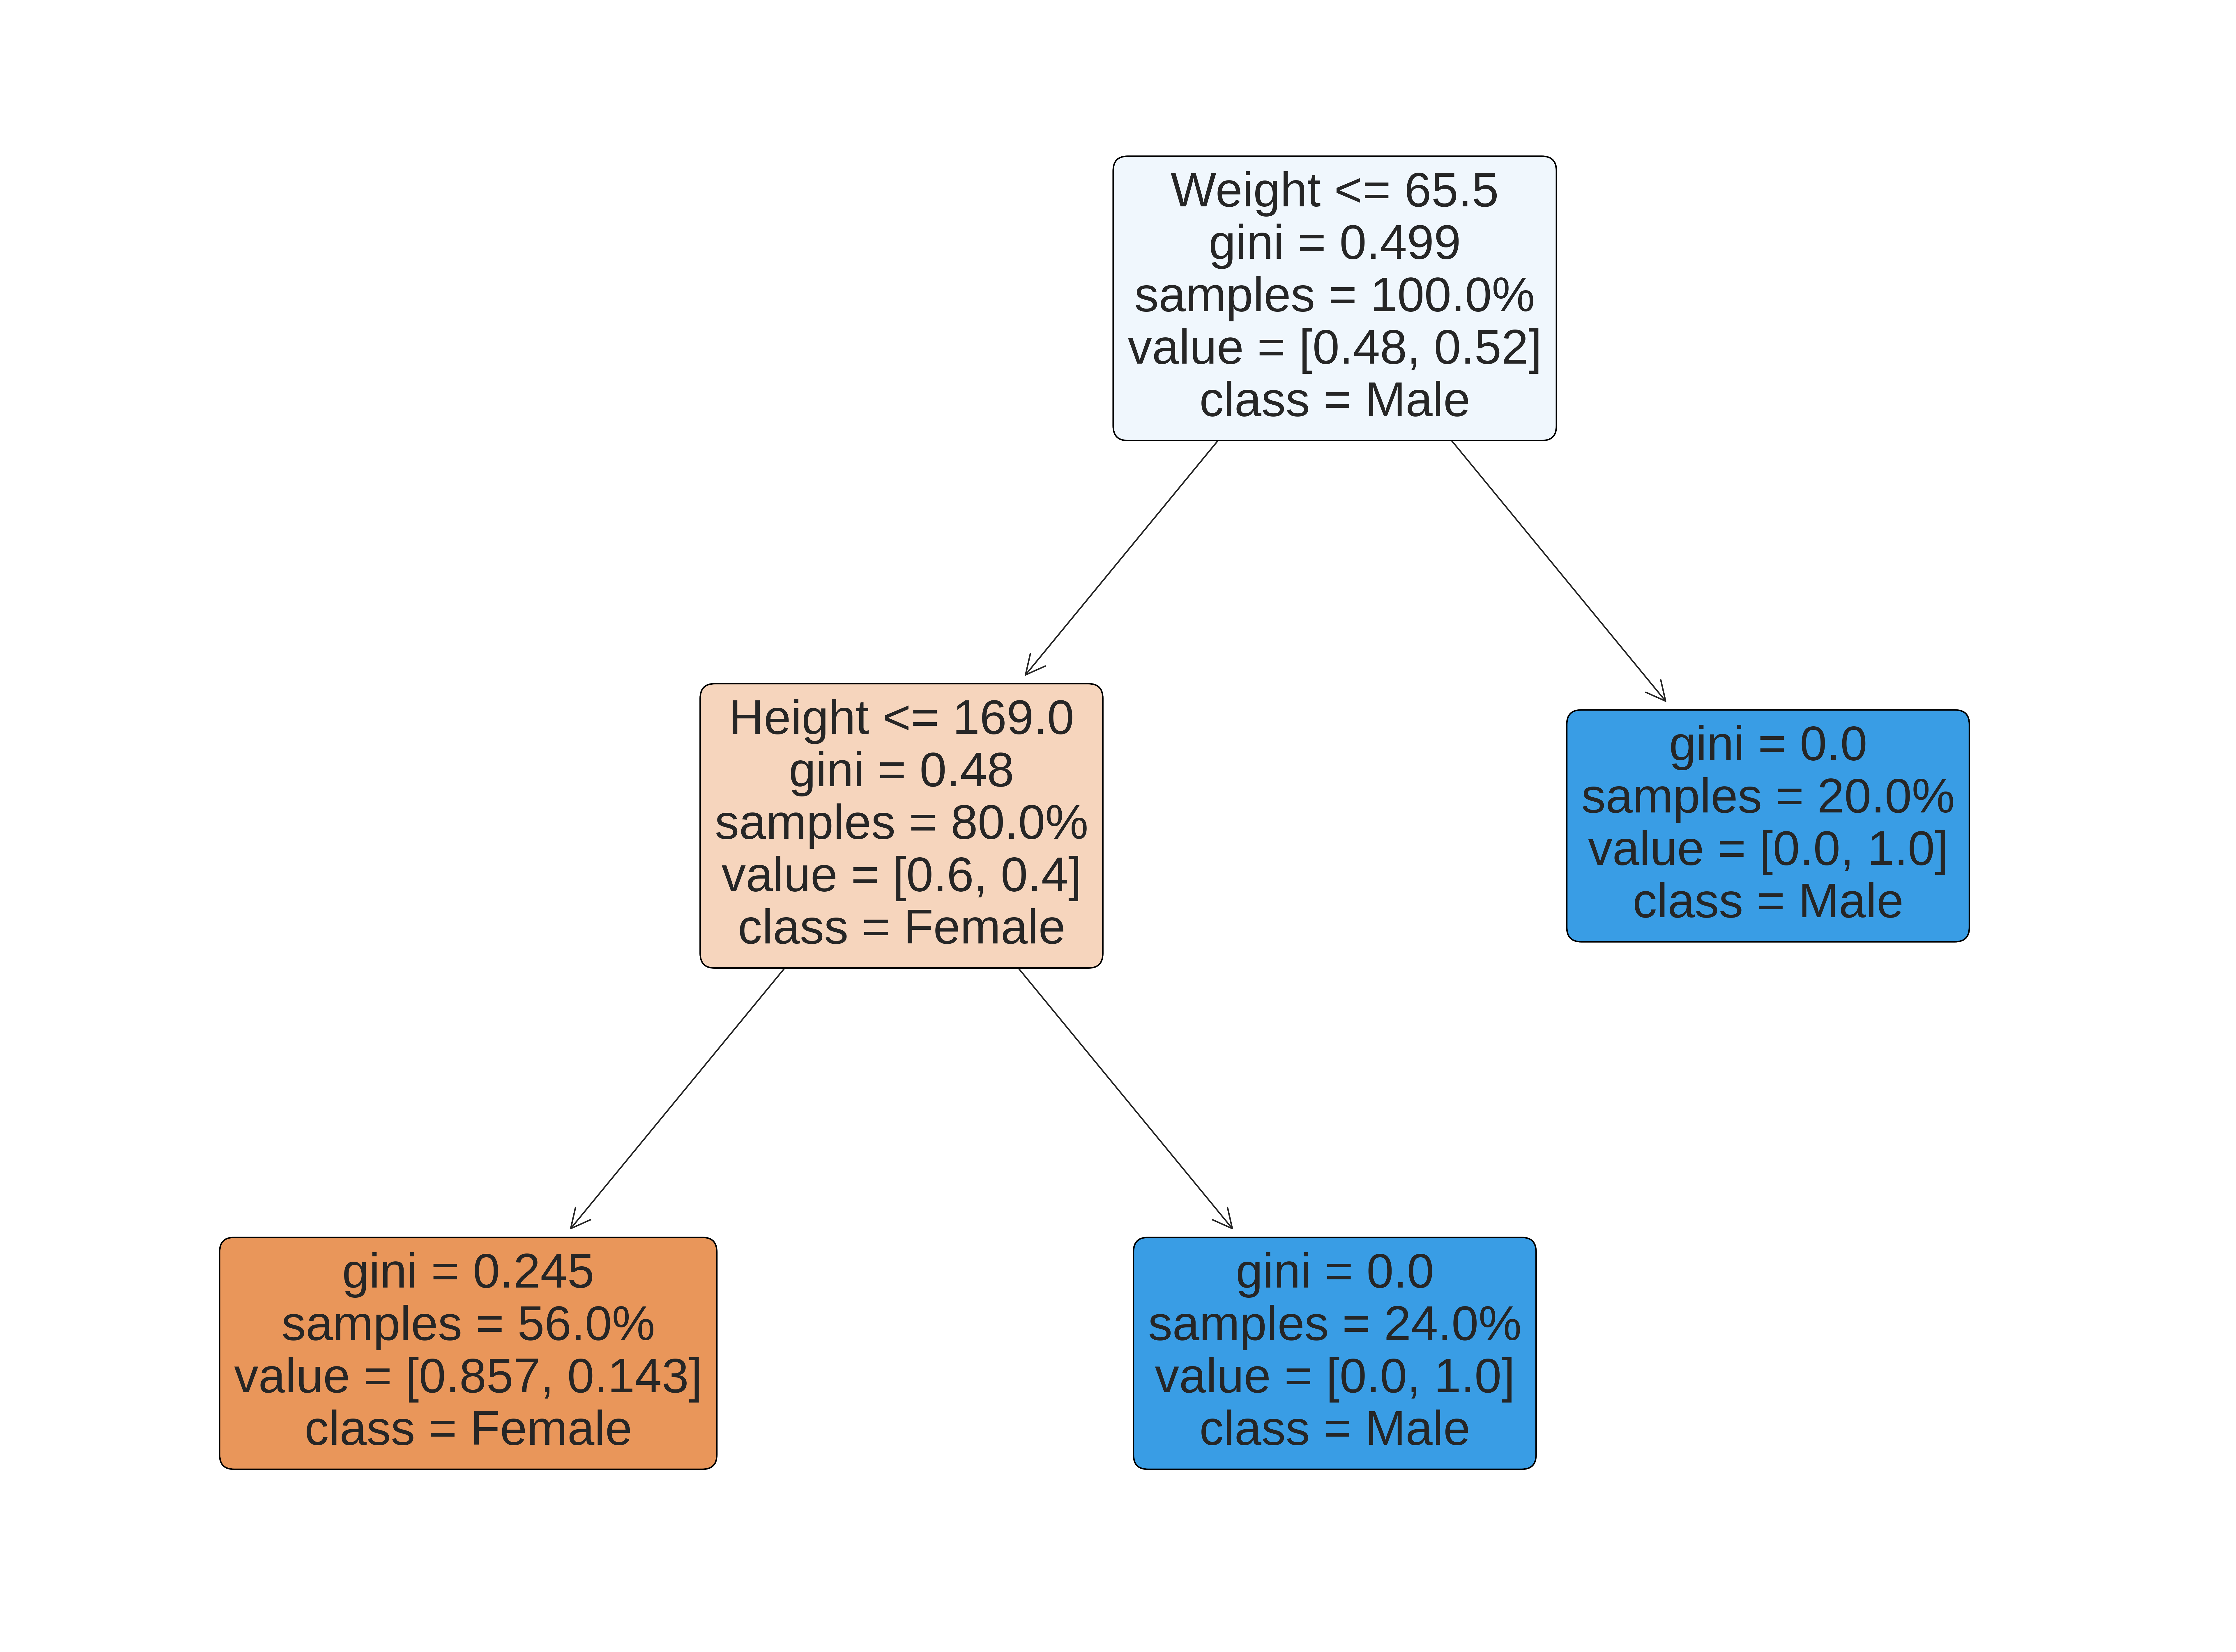

In [32]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,6), dpi=1200)
tree.plot_tree(tuned_dt,feature_names = fn, rounded=True,impurity=True,proportion=True,
               class_names=cn,filled = True,fontsize=10);

dtreeviz
---
Another packages avails the fuctions to make pretty tree-strucued visualisation

In [33]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 921 kB/s 


In [34]:
from dtreeviz.trees import dtreeviz

In [35]:
data

,身高,體重,性別
0,164,47,0
1,185,55,1
2,168,48,0
3,160,47,0
4,155,45,0
5,182,70,1
6,183,66,1
7,166,47,1
8,170,56,1
9,174,70,1


In [36]:
# get train data set

train_pred=predict_model(tuned_dt)
# first index of test data 
test_size=train_pred.index[0]
# train data set
train=data[:test_size]
# split the X_train and y_train
X_train=train.iloc[:,:-1]
y_train=df['性別'].copy()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9091,0.9167,1.0000,0.8333,0.9091,0.8197,0.8333


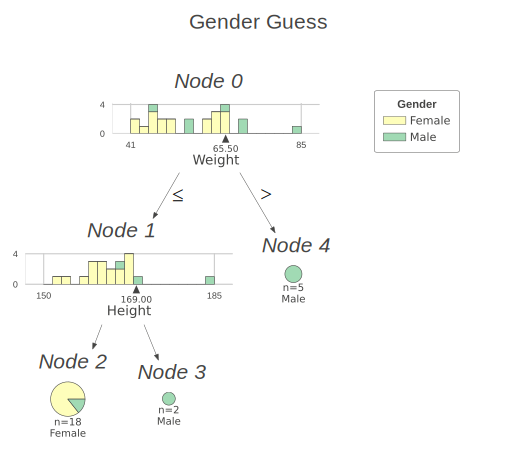

<Figure size 1800x1440 with 0 Axes>

In [43]:
fig=plt.figure(figsize=[25,20])
viz = dtreeviz(tuned_dt, 
x_data=X_train, y_data=np.array(y_train),
target_name='Gender',               
feature_names=['Height', 'Weight'], 
class_names=["Female","Male"], 
title="Gender Guess",show_node_labels = True, scale=1.5)
viz

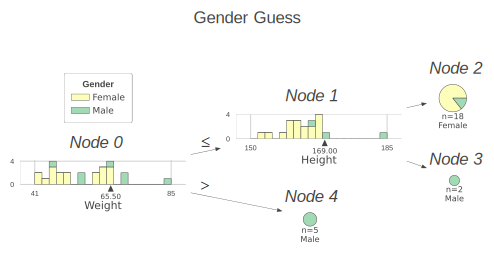

<Figure size 1800x1440 with 0 Axes>

In [45]:
fig=plt.figure(figsize=[25,20])
viz = dtreeviz(tuned_dt, 
x_data=X_train, y_data=np.array(y_train),
target_name='Gender',               
feature_names=['Height', 'Weight'], 
class_names=["Female","Male"], 
orientation='LR', 
title="Gender Guess",show_node_labels = True, scale=1.2)
viz

In [47]:
viz.save_svg()

'/tmp/DTreeViz_66.svg'

In [50]:
!cp /tmp/DTreeViz_66.svg .